----
### PCA - Principal Component Analysis
----
###### Extracted from Python Data Science Handbook (Jake VanderPlas),Introduction to Machine Learning with Python(Andreas Müller)

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
PCA is typically employed prior to implementing a machine learning algorithm because it minimizes the number of variables used to explain the maximum amount of variance for a given data set.
PCA uses "orthogonal linear transformation" to project the features of a data set onto a new coordinate system where the feature which explains the most variance is positioned at the first coordinate (thus becoming the first principal component).

#### PCA Steps

1.Standardize the data.

2.Use the standardized data to create a covariance matrix.

3.Use the resulting matrix to calculate eigenvectors (principal components) and their corresponding eigenvalues.

4.Sort the components in decending order by its eigenvalue.

5.Choose n components which explain the most variance within the data (larger eigenvalue means the feature explains more variance).

6.Create a new matrix using the n components.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
sns.set()
sns.set_palette("Set1", n_colors=8, desat=.5)

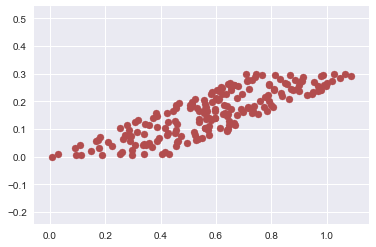

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.rand(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show()

#### Dimensionality Reduction

In [3]:
### Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
message = "{0} shape :{1}"
print(message.format("Original",X.shape))
print(message.format("Reduced",X_pca.shape))

Original shape :(200, 2)
Reduced shape :(200, 1)


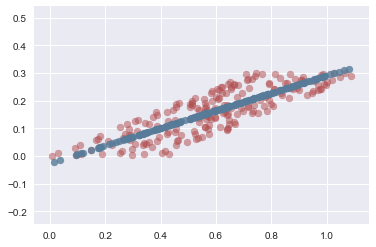

In [4]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

plt.show()

In [5]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
cancer_dataset.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [6]:
### For visualization we reduce it to 2 dimension dataset
print(message.format("Original",cancer_dataset.data.shape))
from sklearn.preprocessing import StandardScaler
 
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(cancer_dataset.data)
print(message.format("Reduced",X_pca.shape))

Original shape :(569, 30)
Reduced shape :(569, 2)


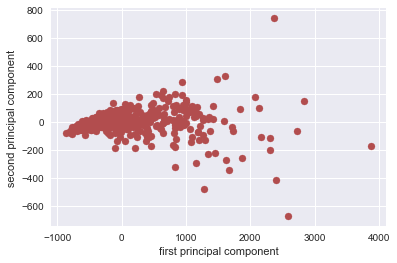

In [7]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

plt.show()

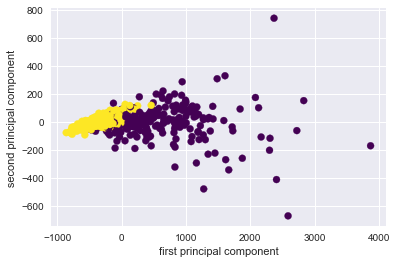

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = cancer_dataset.target ,cmap='viridis')
plt.xlabel("first principal component") 
plt.ylabel("second principal component")
plt.show()

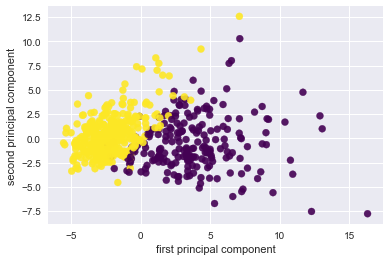

In [9]:
from sklearn.pipeline  import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
pca_scaled =  make_pipeline(StandardScaler(),PCA(n_components = 2))
X_pca_scaled = pca_scaled.fit_transform(cancer_dataset.data)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=cancer_dataset.target, alpha=.9,cmap='viridis')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

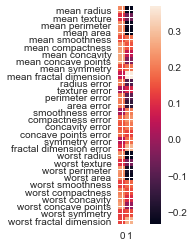

In [10]:
components = pca_scaled.named_steps['pca'].components_
plt.imshow(components.T)
plt.yticks(range(len(cancer_dataset.feature_names)), cancer_dataset.feature_names,)
plt.colorbar()
plt.show()

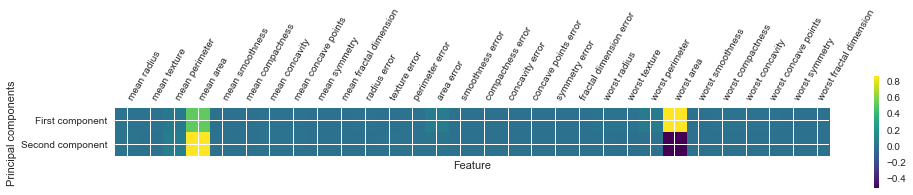

In [11]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer_dataset.feature_names)),
           cancer_dataset.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

#### PCA :Dimensionality Reduction - Example on  digits dataset

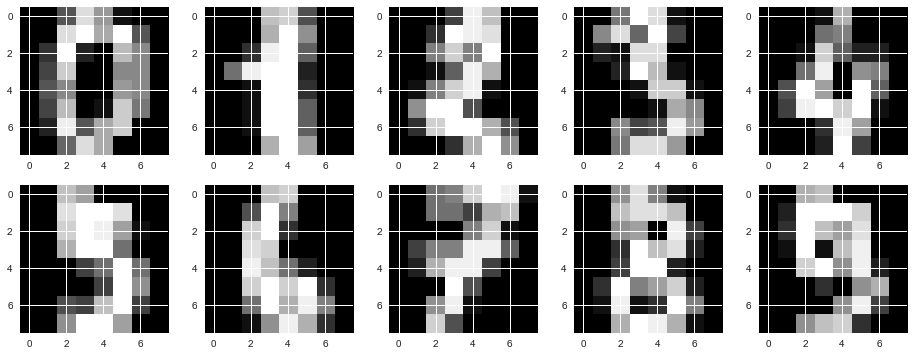

In [12]:
from sklearn.datasets import load_digits

digits_dataset  =  load_digits()
X = digits_dataset.data
y = digits_dataset.target

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');
plt.show()

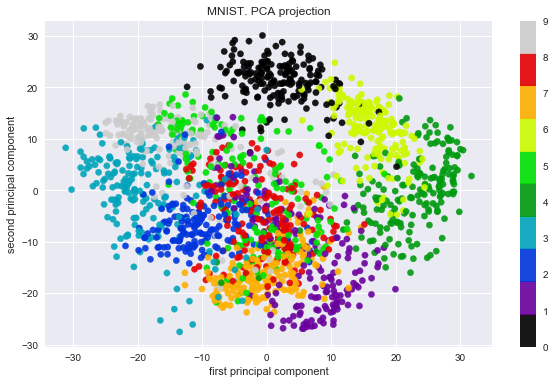

In [13]:
digits_pca =  make_pipeline(PCA(n_components = 2))
X_digits_pca = digits_pca.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=y, alpha=.9,s=40,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.colorbar()
plt.title('MNIST. PCA projection');
plt.show()

#### Total Explained Variance 
This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.
Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 21 components to retain 90% of the variance

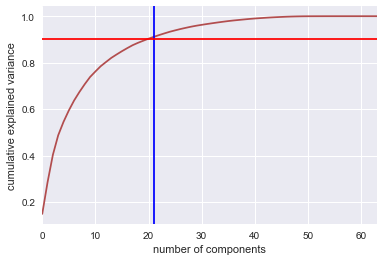

In [14]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.xlim(0, 63)
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

In [15]:
#digits_pca =  make_pipeline(PCA(n_components = 21))
#X_digits_pca = digits_pca.fit_transform(X)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(digits_dataset.data,  
                                                    digits_dataset.target, stratify=digits_dataset.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
print(lr)
print(X_train.shape)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
(1347, 64)
0.996288047513
0.951111111111


#### Using PCA  to reduce dimensions from 64 to 21  and apply logistic regression 

In [16]:
pca_digits = PCA(n_components = 21)
X_train_pca =pca_digits.fit_transform(X_train)
X_test_pca = pca_digits.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)
lr = LogisticRegression().fit(X_train_pca, y_train)
print(lr)
print(lr.score(X_train_pca, y_train))
print(lr.score(X_test_pca, y_test))

(1347, 21)
(450, 21)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.966592427617
0.951111111111


#### Same  as above using pipeline

In [17]:
pca_lr = make_pipeline(PCA(n_components =21),LogisticRegression())
pca_lr.fit(X_train, y_train)
print(pca_lr)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
0.966592427617
0.951111111111


#### PCA :Feature Selection - Example Eigen Faces

In [20]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


RandomizedPCA— PCA(svd_solver='randomized') it contains a randomized method to approximate the first  principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data 

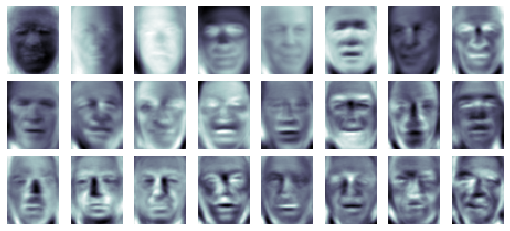

In [23]:
from sklearn.decomposition import PCA
pca  = PCA(n_components =150,svd_solver='randomized')
pca.fit(faces.data)
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                               subplot_kw={'xticks':[], 'yticks':[]},
                               gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
plt.show()

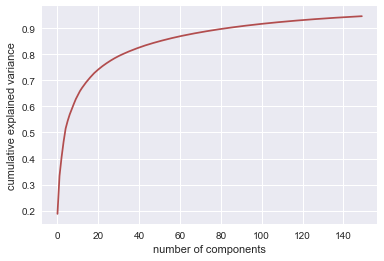

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

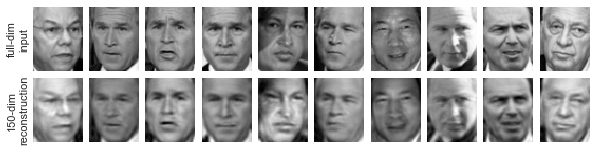

In [29]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                              subplot_kw={'xticks':[], 'yticks':[]},
                              gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')
plt.show()

### PCA Summary
PCA for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.

Given any high-dimensional dataset, Jake VanderPlas advices to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA’s main weakness is that it tends to be highly affected by outliers in the data.

Though PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data


#### Clustering

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster  import KMeans
X,y = make_blobs(centers =4,random_state =1,n_samples =500)
km = KMeans(n_clusters =5,random_state =0)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
print(km.predict(X).shape)
plt.scatter(X[:,0],X[:,1],c =km.labels_)
plt.show()
